In [1]:
from dysh.spectra.spectrum import Spectrum
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from dysh.fits.sdfitsload import SDFITSLoad
from dysh.fits.gbtfitsload import GBTFITSLoad
import pandas
pandas.set_option('display.max_rows', 100)


In [2]:
y = 3.1415927+np.random.rand(1000)
x = np.arange(1000)*u.um
s = Spectrum(flux=y*u.K,spectral_axis=x,velocity_convention='doppler_radio',radial_velocity=25*u.Unit('km/s'))

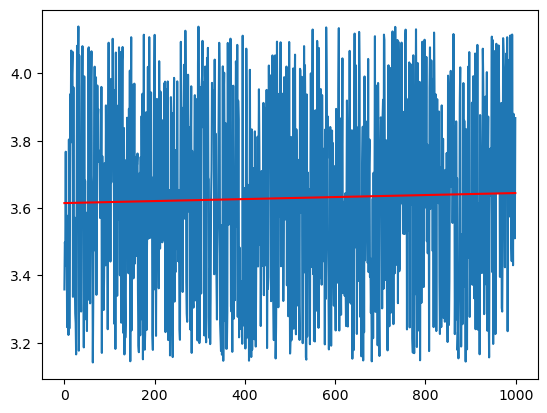

In [3]:
fig,ax=plt.subplots()
ax.plot(s.spectral_axis,s.flux)
s.baseline(1,remove=False)
ax.plot(s.spectral_axis,s._baseline_model(s.spectral_axis),color='r')

In [4]:
print(s.stats())
s.bshow()

(<Quantity 3.62998136 K>, 0.2895368527800156, <Quantity 3.14164474 K>, <Quantity 4.13960442 K>)
baseline model Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0                  c1          
            K                 K / um        
    ----------------- ----------------------
    3.615111823268567 2.9768843602500827e-05


(<Quantity -1.13153931e-15 K>, 0.28940929584382613, <Quantity -0.49728411 K>, <Quantity 0.52356976 K>)
baseline model Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0                  c1          
            K                 K / um        
    ----------------- ----------------------
    3.615111823268567 2.9768843602500827e-05


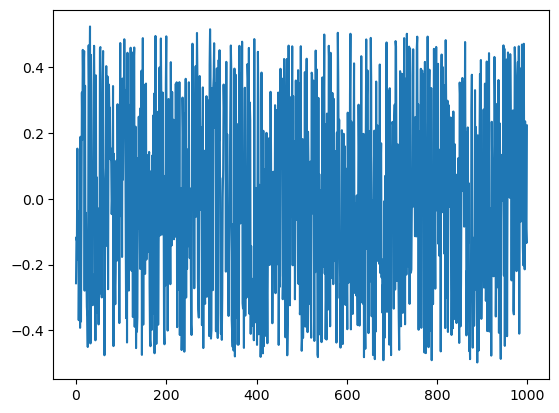

In [5]:
s = Spectrum(flux=y*u.K,spectral_axis=x,velocity_convention='doppler_radio',radial_velocity=25*u.Unit('km/s'))
s.baseline(1,remove=True)
fig,ax=plt.subplots()
ax.plot(s.spectral_axis,s.flux)
print(s.stats())
s.bshow()

In [6]:
s._undo_baseline()
print(s.stats())
s.bshow()


(<Quantity 3.62998136 K>, 0.2895368527800156, <Quantity 3.14164474 K>, <Quantity 4.13960442 K>)
baseline model None


In [7]:
#f = '/data/gbt/examples/misc/ngc5291.fits'
f = '/data/gbt/examples/onoff-L/data/TGBT21A_501_11.raw.vegas.fits'
#f = '/data/gbt/examples/nod-KFPA/data/TGBT22A_503_02.raw.vegas/TGBT22A_503_02.raw.vegas.A.fits'
p = GBTFITSLoad(f)

==SDFITSLoad /data/gbt/examples/onoff-L/data/TGBT21A_501_11.raw.vegas.fits
doing pandas for HDU 1
==GBTLoad /data/gbt/examples/onoff-L/data/TGBT21A_501_11.raw.vegas.fits
0 OBJECT: ['NGC2415']
0 SCAN: [152, 153]
0 SAMPLER: ['A1_0', 'A2_0', 'A1_1', 'A2_1', 'A1_2', 'A2_2', 'A1_3', 'A2_3', 'A1_4', 'A2_4']
0 SIG: ['T']
0 CAL: ['F', 'T']
0 PROCSEQN: [1, 2]
0 PROCSIZE: [2]
0 OBSMODE: ['OnOff:PSWITCHON:TPWCAL', 'OnOff:PSWITCHOFF:TPWCAL']
0 SIDEBAND: ['L']


In [8]:
"_OBSTYPE" in p._ptable[0].columns

True

In [9]:
p.summary()[0]

/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:82: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  _df = df[df.columns & show]
/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:,"VELOCITY"] = _df["VELOCITY"]/1E3   # convert to km/s
/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,IFNUM,FEED,AZIMUTH,ELEVATIO,FDNUM
0,152,NGC2415,3784.0,OnOff,1,1.420406,0,1,285.951496,42.100624,0
1,152,NGC2415,3784.0,OnOff,1,1.420406,0,1,285.951496,42.100624,0
2,152,NGC2415,3784.0,OnOff,1,1.420406,0,1,285.951496,42.100624,0
3,152,NGC2415,3784.0,OnOff,1,1.420406,0,1,285.951496,42.100624,0
4,152,NGC2415,3784.0,OnOff,1,1.612231,1,1,285.951496,42.100624,0
...,...,...,...,...,...,...,...,...,...,...,...
6035,153,NGC2415,3784.0,OnOff,2,1.667359,3,1,287.149353,40.652970,0
6036,153,NGC2415,3784.0,OnOff,2,1.720530,4,1,287.149353,40.652970,0
6037,153,NGC2415,3784.0,OnOff,2,1.720530,4,1,287.149353,40.652970,0
6038,153,NGC2415,3784.0,OnOff,2,1.720530,4,1,287.149353,40.652970,0


In [10]:
np.unique(p._ptable[0]['RESTFREQ'])

array([1.42040575e+09, 1.61223100e+09, 1.66540180e+09, 1.66735900e+09,
       1.72052990e+09])

In [ ]:
df=p._ptable[0].copy()
df.columns

In [ ]:
df["RESTFREQ"]/=1E9
df["RESTFREQ"]

In [ ]:
show = ["SCAN", "OBJECT", "OBSMODE", "VELOCITY", "PROCSCAN", "PROCSEQN", "PROCTYPE", "PROCSIZE", "RESTFREQ", "IFNUM","FEED", "AZIMUTH", "ELEVATIO", "FDNUM"] 
scan = [60,61]
_df = df[df.columns & show].reindex(columns=show)

In [ ]:
_df["OBSMODE"].str.split(':',expand=True)

In [ ]:

_df[(_df["SCAN"]>=scan[0]) & ( _df["SCAN"] <= scan[1])]

In [ ]:
df["SCAN"]

In [ ]:
df['PROCTYPE']